## Importing Basic Libraries

In [73]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns


import warnings

## EDA 

In [74]:
df = pd.read_csv("Dataset .csv")

In [75]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [76]:
df_info = df.info()
df_head = df.head()
df_missing = df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [77]:
# Drop unnecessary columns
df_cleaned = df.drop(columns=["Restaurant ID", "Restaurant Name", "Address", "Locality", 
                              "Locality Verbose", "Rating color", "Rating text", "Currency"])






In [78]:
df_cleaned.head()

,Country Code,City,Longitude,Latitude,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Votes
0,162,Makati City,121.027535,14.565443,"French, Japanese, Desserts",1100,Yes,No,No,No,3,4.8,314
1,162,Makati City,121.014101,14.553708,Japanese,1200,Yes,No,No,No,3,4.5,591
2,162,Mandaluyong City,121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Yes,No,No,No,4,4.4,270
3,162,Mandaluyong City,121.056475,14.585318,"Japanese, Sushi",1500,No,No,No,No,4,4.9,365
4,162,Mandaluyong City,121.057508,14.584450,"Japanese, Korean",1500,Yes,No,No,No,4,4.8,229


In [79]:
# Handle missing values in 'Cuisines' by filling with "Unknown"
df.loc[:, 'Cuisines'] = df['Cuisines'].fillna('Unknown')



In [80]:
df_cleaned['Switch to order menu'].unique()

array(['No'], dtype=object)

In [81]:
# Drop the redundant column
df_cleaned = df_cleaned.drop(columns=["Switch to order menu"])




In [82]:
# Define features and target variable
X = df_cleaned.drop(columns=["Aggregate rating"])
y = df_cleaned["Aggregate rating"]



In [83]:
# Identify categorical columns
categorical_cols = X.select_dtypes(include=["object"]).columns

In [84]:
# Separate high-cardinality and low-cardinality categorical columns
high_cardinality_cols = [col for col in categorical_cols if df[col].nunique() > 50]
low_cardinality_cols = list(set(categorical_cols) - set(high_cardinality_cols))

## Encoding for Categorical Features

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler,OneHotEncoder

In [86]:
# Apply Label Encoding for high-cardinality columns
label_encoders = {}
for col in high_cardinality_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le  # Store encoder for future use

In [87]:
# Apply One-Hot Encoding for low-cardinality columns
encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
X_low_card_encoded = pd.DataFrame(encoder.fit_transform(X[low_cardinality_cols]))

In [88]:
# Rename columns
X_low_card_encoded.columns = encoder.get_feature_names_out(low_cardinality_cols)

In [89]:
# Drop original low-cardinality columns and merge encoded ones
X = X.drop(columns=low_cardinality_cols).reset_index(drop=True)
X_low_card_encoded = X_low_card_encoded.reset_index(drop=True)
X_processed = pd.concat([X, X_low_card_encoded], axis=1)

## Scaling the Features

In [90]:
# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



## Train Test Split

In [91]:


# Split dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Check preprocessed data shape
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7640, 8), (1911, 8), (7640,), (1911,))

## Checking the Performance of various models

In [92]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score




In [93]:


# Train a Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)




LinearRegression()

In [94]:
# Make predictions
y_pred = lr_model.predict(X_test)



Text(0, 0.5, 'Test Predicted Data')

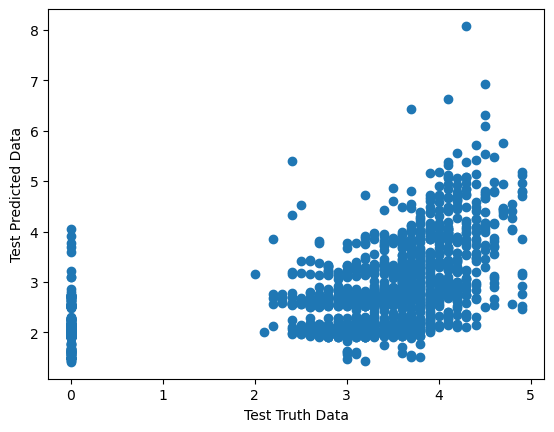

In [95]:
plt.scatter(y_test,y_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

In [96]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2

(1.6896336509447534, 0.2576657540836772)

In [97]:
from sklearn.tree import DecisionTreeRegressor



In [98]:
# Train a Decision Tree Regressor model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)



DecisionTreeRegressor(random_state=42)

In [99]:
# Make predictions
y_pred_dt = dt_model.predict(X_test)



In [100]:
# Evaluate the model
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

mse_dt, r2_dt


(0.1856776556776557, 0.9184232141482781)

In [101]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

mse_rf, r2_rf


(0.08896605442176868, 0.9609130956379764)

The beast model for the dataset is RandomForest Regression 

## Hyperparameter Tuning for best params

In [102]:
# Re-import necessary libraries for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid again
param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [10, 20, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

# Recreate GridSearchCV
grid_search = GridSearchCV(
    RandomForestRegressor(random_state=42), 
    param_grid, 
    cv=5, 
    scoring="r2", 
    n_jobs=-1
)

# Fit the model with optimized categorical encoding
grid_search.fit(X_train, y_train)

# Get best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_params, best_score


({'max_depth': None,
  'min_samples_leaf': 1,
  'min_samples_split': 10,
  'n_estimators': 200},
 0.9592933621064406)

In [103]:
# Train the best Random Forest model with optimal parameters
best_rf = RandomForestRegressor(
    n_estimators=200,  # Best parameter from previous tuning
    max_depth=20,      # Best parameter from previous tuning
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)

In [104]:
best_rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, min_samples_leaf=2, min_samples_split=5,
                      n_estimators=200, random_state=42)

## Most Important feature selection for restraunt rating

In [105]:
# Extract feature importances
feature_importances = best_rf.feature_importances_
feature_names = X_processed.columns

In [106]:
# Get only the first 'n' feature names that match feature importances
matched_feature_names = feature_names[:len(feature_importances)]

# Create the DataFrame correctly
importance_df = pd.DataFrame({"Feature": matched_feature_names, "Importance": feature_importances})

# Sort by importance
importance_df = importance_df.sort_values(by="Importance", ascending=False)





## Final output of the task

In [107]:
# Display the top 10 most influential features
importance_df.head(10)

,Feature,Importance
7,Votes,0.953937
2,Longitude,0.013988
3,Latitude,0.010843
4,Cuisines,0.009524
5,Average Cost for two,0.006063
0,Country Code,0.003276
1,City,0.001637
6,Price range,0.000732
